In [2]:
import pandas as pd
# import ast
# import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import re
# import random
# import string
%matplotlib inline


# something a warning told me to do?
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.width', 150)

import import_func as imp
import tags_work as tgs
import desc_vis as vis
import classifier_func as cls
import classifier_help as clh

print("done")

done


In [3]:
full_advice = "../data/genre_advice_full_021520.jl"
full_filename = "../data/by_article_fulltext_020920.jl"

categories = [
        # "ctscinet", # no defined genre
        "career_related_policy",
        "working_life",
        "career_profiles",
        # "life_and_career_balance",# no defined genre
        # "myscinet", # no defined genre
        # "issues_and_perspectives", # too much overlap with advice, no defined genre
        "advice"
        ]

def output_plot(outfile):
    fig1 = plt.gcf()
    plt.show()
    plt.draw()
    fig1.savefig(outfile, dpi=100)

# get full text dataset as a df
advice_df = imp.init_df(full_advice, "full", genre="advice")
advice_df = advice_df[advice_df["year"]<2020]
full_df = imp.init_df(full_filename, "full")
full_df = full_df[full_df["year"]<2020]
# full_df["probnews"] = np.where(
#         (full_df["advice"] == "no") & (full_df["one_time"] == "no"),
#         "yes",
#         "no",
#     )

# advice_tag_df = full_df[full_df.advice=="yes"]
# wl_tag_df = full_df[full_df.one_time=="yes"]
# news_tag_df = full_df[full_df.probnews=="yes"]

print("done")

done


In [4]:
full_df.head(2)

,id,headline,tags,authors,date,time,text,bio,date_seq,month_seq,year,career_related_policy,working_life,career_profiles,advice,author,n_posts_author,column1,column2,one_time
0,5839,how to write a winning résumé,"[tooling up, advice, graduate, academic, industry, americas, united states]",peter fiske,1996-10-18,8:00 am,"bywelcome to ""tooling up,"" a monthly column about job hunting and career development for scienti...","[peter fiske is a ph.d. scientist and co-founder of rapt industries, a technology company in fre...",18,10,1996,no,no,no,yes,peter fiske,59,no,yes,no
1,5835,the commandments of cover letter creation,"[tooling up, advice, americas]",peter fiske,1996-12-20,0:00 am,"by've always hated the term ""cover letter."" it implies that the letter you send out to accompany...","[peter fiske is a ph.d. scientist and co-founder of rapt industries, a technology company in fre...",81,12,1996,no,no,no,yes,peter fiske,59,no,yes,no


In [5]:
# full_vis = vis.prep_per(full_df, group_by="year")
# advice_vis = vis.prep_per(advice_df, group_by="year")

# sns.lineplot(x = "year", y = "n", color = "blue", data=advice_vis)
# sns.lineplot(x = "year", y = "n", color = "red", data=full_vis)

In [6]:
# # just using the advice scrape only 

# counts_df = clh.modals(advice_df)

# counts_df["frac"] = counts_df["modals"]/counts_df["wc"]

# advice_counts_plot_df = counts_df.groupby("year").mean()

# advice_counts_plot_df = advice_counts_plot_df.reset_index()

# # counts_plot_df.head()

# sns.lineplot(x = "year", y = "frac", color = "green", label="advice", data=advice_counts_plot_df)

# plt.savefig("../figs/person_advice.png")

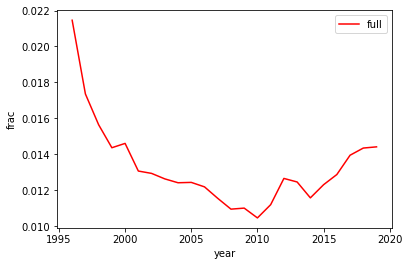

In [7]:
counts_df = clh.modals(full_df)

# print(counts_df.head())

counts_df["frac"] = counts_df["modals"]/counts_df["wc"]

counts_plot_df = counts_df.groupby("year").mean()

full_counts_plot_df = counts_plot_df.reset_index()
counts_plot_df = counts_plot_df.reset_index()
# counts_df.head()

sns.lineplot(x = "year", y = "frac", color = "red", label="full", data=full_counts_plot_df)

# plt.savefig("../figs/modal_all.png")

Text(0.5, 1.0, 'all incidence')

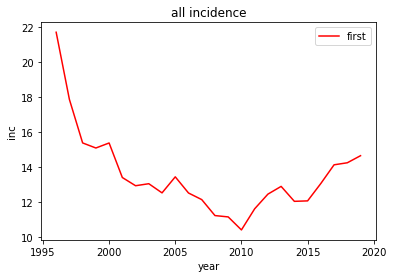

In [8]:
counts_df = clh.modals(full_df)

counts_df = counts_df.groupby("year").sum()

counts_df["inc"] = counts_df["modals"]*1000/counts_df["wc"]

full_inc_plots_df = counts_df.reset_index()

sns.lineplot(x = "year", y = "inc", color = "red", label="first", data=full_inc_plots_df)
plt.title("all incidence")
# plt.ylim(0,0.08)
# plt.title("advice")

Text(0.5, 1.0, 'all incidence')

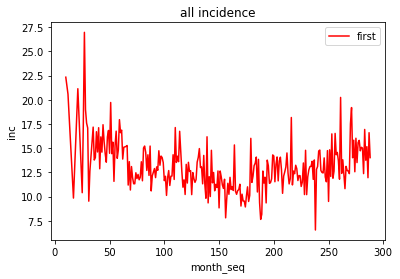

In [9]:
counts_df = clh.modals(full_df)

counts_df = counts_df.groupby("month_seq").sum()

counts_df["inc"] = counts_df["modals"]*1000/counts_df["wc"]

full_inc_month_plots_df = counts_df.reset_index()


sns.lineplot(x = "month_seq", y = "inc", color = "red", label="first", data=full_inc_month_plots_df)
plt.title("all incidence")
# plt.ylim(0,0.08)
# plt.title("advice")

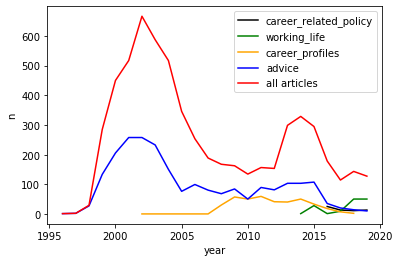

In [10]:
full_vis = vis.prep_per(full_df, group_by="year")
# advice_vis = vis.prep_per(advice_df, group_by="year")

colors = ["black","green","orange","blue","purple","yellow"]
dfs = []
count=0

for cat in categories:
    cat_df = full_df[full_df[cat] == "yes"]
    dfs.append(cat_df)
    cat_vis = vis.prep_per(cat_df, group_by = "year")
    # print(cat_vis.head())
    sns.lineplot(x = "year", y = "n", color = colors[count], legend="full", label=cat, data = cat_vis)
    count+=1

sns.lineplot(x = "year", y = "n", color = "red", legend="full", label="all articles",data = full_vis)

In [11]:
policy_df = dfs[0]
wl_df = dfs[1]
profile_df = dfs[2]
advice_df = dfs[3]

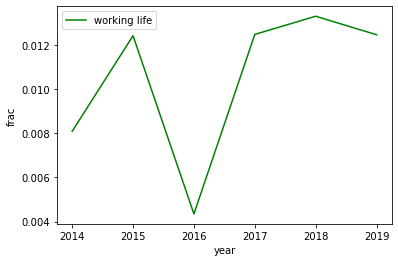

In [12]:
# print(len(wl_tag_df))
counts_df = clh.modals(wl_df)

counts_df["frac"] = counts_df["modals"]/counts_df["wc"]

wl_tag_counts_plot_df = counts_df.groupby("year").mean()

wl_tag_counts_plot_df = wl_tag_counts_plot_df.reset_index()

# counts_plot_df.head()

sns.lineplot(x = "year", y = "frac", color = "green", label="working life", data=wl_tag_counts_plot_df)

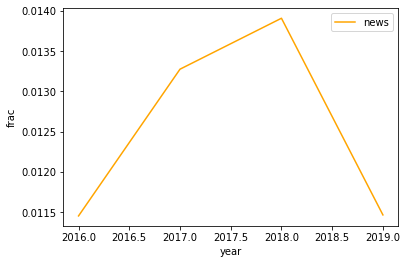

In [13]:
counts_df = clh.modals(policy_df)

counts_df["frac"] = counts_df["modals"]/counts_df["wc"]

news_tag_counts_plot_df = counts_df.groupby("year").mean()

news_tag_counts_plot_df = news_tag_counts_plot_df.reset_index()

# counts_plot_df.head()

sns.lineplot(x = "year", y = "frac", color = "orange", label="news", data=news_tag_counts_plot_df)

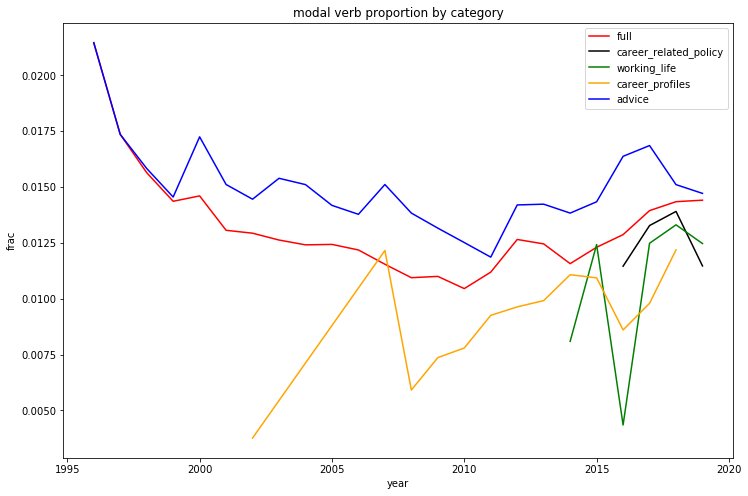

<Figure size 432x288 with 0 Axes>

In [14]:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "year", y = "frac", color = "red", label="full", data=full_counts_plot_df)
count=0


for df in dfs:
    counts_df = clh.modals(df)

    counts_df["frac"] = counts_df["modals"]/counts_df["wc"]

    counts_plot_df = counts_df.groupby("year").mean()

    counts_plot_df = counts_plot_df.reset_index()

    sns.lineplot(x = "year", y = "frac", color = colors[count], label=categories[count], data=counts_plot_df)
    count+=1

plt.title("modal verb proportion by category")
output_plot("../figs/modal_by_category.png")
# plt.savefig("../figs/modal_by_category.png")

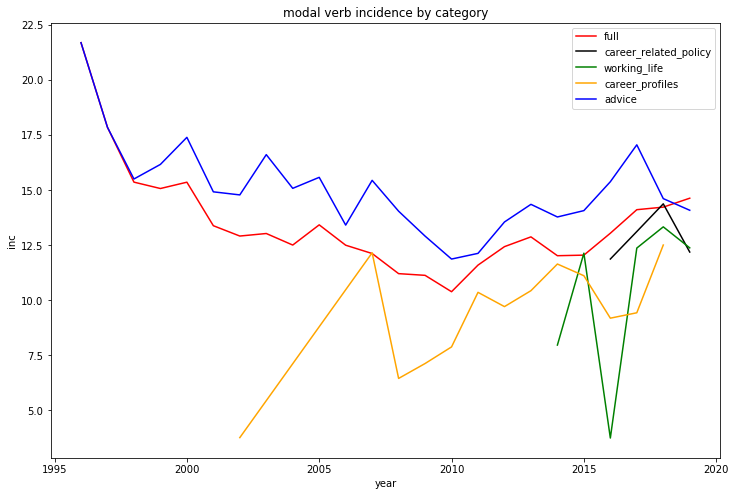

<Figure size 432x288 with 0 Axes>

In [15]:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "year", y = "inc", color = "red", label="full", data=full_inc_plots_df)
count=0


for df in dfs:
    counts_df = clh.modals(df)

    counts_df = counts_df.groupby("year").sum()
    counts_df["inc"] = counts_df["modals"]*1000/counts_df["wc"]

    counts_plot_df = counts_df.reset_index()

    sns.lineplot(x = "year", y = "inc", color = colors[count], label=categories[count], data=counts_plot_df)
    count+=1

plt.title("modal verb incidence by category")
output_plot("../figs/modal_by_category_inc.png")
# plt.savefig("../figs/modal_by_category.png")

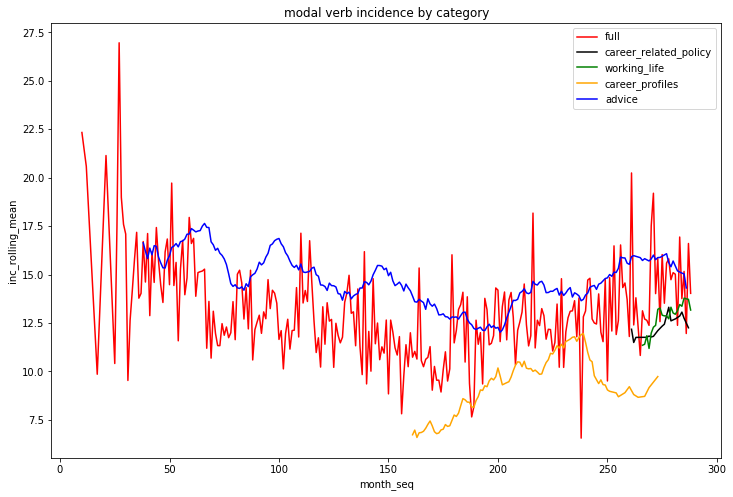

<Figure size 432x288 with 0 Axes>

In [16]:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "month_seq", y = "inc", color = "red", label="full", data=full_inc_month_plots_df)
count=0


for df in dfs:
    counts_df = clh.modals(df)

    counts_df = counts_df.groupby("month_seq").sum()
    counts_df["inc"] = counts_df["modals"]*1000/counts_df["wc"]

    counts_plot_df = counts_df.reset_index()

    counts_plot_df["inc_rolling_mean"] = counts_plot_df.inc.rolling(18).mean() 

    sns.lineplot(x = "month_seq", y = "inc_rolling_mean", color = colors[count], label=categories[count], data=counts_plot_df)
    count+=1

plt.title("modal verb incidence by category")
output_plot("../figs/modal_by_category_month_inc.png")
# plt.savefig("../figs/modal_by_category.png")

<Figure size 864x576 with 0 Axes>

<Figure size 432x288 with 0 Axes>

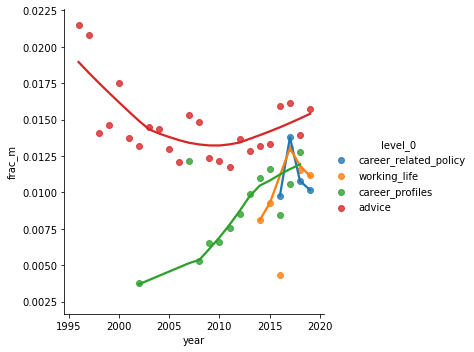

In [17]:
plt.figure(figsize=(12, 8))


count=0
pieces=[]
for df in dfs:
    # cat_df = full_df[full_df[cat] == "yes"]
    counts_df = clh.modals(df)
    counts_df["frac_m"] = counts_df["modals"]/counts_df["wc"]
    
    counts_plot_df = counts_df.groupby("year").median()
    counts_plot_df = counts_plot_df.reset_index()

    pieces.append(counts_plot_df)

    # sns.lmplot(x = "year", y = "frac_m",lowess=True, data = counts_plot_df)
    # plt.title("modals "+categories[count])
    # sns.lineplot(x = "year", y = "frac1", color = "red", label="first", data=full_counts_plot_df)

    count+=1

reg = pd.concat(pieces, keys=['career_related_policy', 'working_life', 'career_profiles','advice'])
reg = reg.reset_index()


output_plot("../figs/modal_by_category_loess")
sns.lmplot(x = "year", y = "frac_m",lowess=True, hue="level_0", data = reg)

<Figure size 864x576 with 0 Axes>

<Figure size 432x288 with 0 Axes>

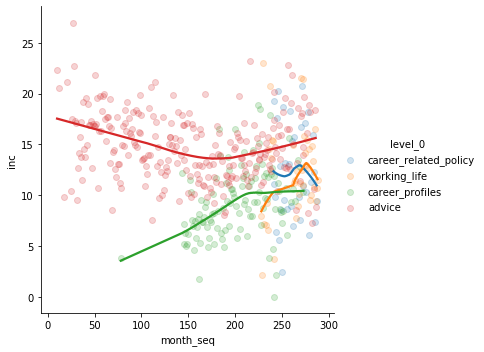

In [18]:
plt.figure(figsize=(12, 8))


count=0
pieces=[]
for df in dfs:
    # cat_df = full_df[full_df[cat] == "yes"]
    counts_df = clh.modals(df)
    counts_df = counts_df.groupby("month_seq").sum()
    counts_df["inc"] = counts_df["modals"]*1000/counts_df["wc"]
    
    counts_plot_df = counts_df.reset_index()

    pieces.append(counts_plot_df)

    # sns.lmplot(x = "year", y = "frac_m",lowess=True, data = counts_plot_df)
    # plt.title("modals "+categories[count])
    # sns.lineplot(x = "year", y = "frac1", color = "red", label="first", data=full_counts_plot_df)

    count+=1

reg = pd.concat(pieces, keys=['career_related_policy', 'working_life', 'career_profiles','advice'])
reg = reg.reset_index()


sns.lmplot(x = "month_seq", y = "inc",lowess=True, hue="level_0",scatter_kws={'alpha':0.2}, data = reg)
output_plot("../figs/modal_by_category_month_loess")